In [78]:
import os
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import numpy as np

from tvDatafeed import TvDatafeed,Interval

username = 'username'
password = 'username'



tv = TvDatafeed(username, password, chromedriver_path=None)
from tvDatafeed import TvDatafeed, Interval
import datetime
import logging
logging.basicConfig(level=logging.DEBUG)
tv=TvDatafeed(auto_login=False)


DEBUG:tvDatafeed.main:auth loaded
DEBUG:tvDatafeed.main:auth loaded


In [79]:
#Create TradingView variable and activate env variables
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")

In [80]:
#Log into TradingView
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(tradev_id, tradev_secret_key, chromedriver_path=None)

DEBUG:tvDatafeed.main:auth loaded


In [81]:
import datetime
today = datetime.date.today()
someday = datetime.date(2021, 1, 1)
diff = abs(someday - today)


## Cryptara Smartfolio 

In [ ]:
 print(f" ")
    print(f" ")
    print(f" ")

In [82]:
#----Read in the data for each crypto. Another option is to run a for loop to obtain large amounts of data into a dataset. Get suggestions from TradingView
screener='CRYPTO'
exchange="BINANCE"
# --- Crypto Selection= 
# crypto_one =
# crypto_two = 
# crypto_three = 
# crypto_four = 
# crypto_five = 
# crypto_six = 

# --- Date selection in day. diff.days represents year to date.
#bars=diff.days
#bars=500
bars= 365
#bars= 182
#bars= 100 
#bars= 60
#bars= 30
#bars= 7

crypto_one_df = tv.get_hist(symbol='ADAUSD',exchange=exchange,interval=Interval.in_daily,n_bars=bars)
crypto_two_df = tv.get_hist(symbol='BTCUSD',exchange=exchange,interval=Interval.in_daily,n_bars=bars)
crypto_three_df = tv.get_hist(symbol='DOGEUSD',exchange=exchange,interval=Interval.in_daily,n_bars=bars)
crypto_four_df = tv.get_hist(symbol='ETHUSD',exchange=exchange,interval=Interval.in_daily,n_bars=bars)
crypto_five_df = tv.get_hist(symbol='SOLUSD',exchange=exchange,interval=Interval.in_daily,n_bars=bars)
# crypto_six_df = tv.get_hist(symbol='UNIUSD',exchange=exchange,interval=Interval.in_daily,n_bars=bars)
# crypto_7_df = tv.get_hist(symbol='SUSHIUSD',exchange=exchange,interval=Interval.in_daily,n_bars=bars)
# crypto_8_df = tv.get_hist(symbol='COMPUSD',exchange=exchange,interval=Interval.in_daily,n_bars=bars)
# crypto_9_df = tv.get_hist(symbol='STORJUSD',exchange=exchange,interval=Interval.in_daily,n_bars=bars)
# crypto_10_df = tv.get_hist(symbol='AVAXUSD',exchange=exchange,interval=Interval.in_daily,n_bars=bars)


DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:ADAUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:BTCUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:DOGEUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:ETHUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for BINANCE:SOLUSD...


In [70]:

return_df = pd.DataFrame()
#---Calculate returns
crypto_one_df_returns = crypto_one_df['close'].pct_change().dropna()
crypto_two_df_returns = crypto_two_df['close'].pct_change().dropna()
crypto_three_df_returns = crypto_three_df['close'].pct_change().dropna()
crypto_four_df_returns = crypto_four_df['close'].pct_change().dropna()
crypto_five_df_returns = crypto_five_df['close'].pct_change().dropna()
# crypto_six_df_returns = crypto_six_df['close'].pct_change().dropna()


#---Create a column in empty dataframe with return data
return_df['ADAUSD'] = crypto_one_df_returns
return_df['BTCUSD'] = crypto_two_df_returns
return_df['DOGEUSD'] = crypto_three_df_returns
return_df['ETHUSD'] = crypto_four_df_returns
return_df['SOLUSD'] = crypto_five_df_returns
# return_df['UNIUSD'] = crypto_six_df_returns

#Combined df of daily returns
cumulative_daily_returns = (1 + return_df).cumprod() -1
#cumulative_returns.plot(figsize=(25, 15))
cumulative_daily_returns.head()

,ADAUSD,BTCUSD,DOGEUSD,ETHUSD,SOLUSD
datetime,,,,,
2020-09-20 19:00:00,-0.106885,-0.046074,-0.046255,-0.083063,-0.034476
2020-09-21 19:00:00,-0.088411,-0.035945,-0.035344,-0.071776,0.017353
2020-09-22 19:00:00,-0.143063,-0.063026,-0.062869,-0.136222,-0.005996
2020-09-23 19:00:00,-0.074633,-0.018630,-0.055042,-0.058091,0.097424
2020-09-24 19:00:00,0.085524,-0.021441,0.018167,-0.050966,0.114328


In [83]:
#log of returns (promotes fairness among asset prices)

log_returns= np.log(cumulative_daily_returns)
log_returns.tail()

,ADAUSD,BTCUSD,DOGEUSD,ETHUSD,SOLUSD
datetime,,,,,
2021-09-14 19:00:00,3.297845,1.224955,4.495882,2.168605,3.997662
2021-09-15 19:00:00,3.260622,1.218245,4.473911,2.154250,3.954391
2021-09-16 19:00:00,3.230559,1.203927,4.463805,2.099266,3.921347
2021-09-17 19:00:00,3.240618,1.231500,4.469388,2.111987,4.061893
2021-09-18 19:00:00,3.234740,1.216016,4.464874,2.104638,4.043537


In [84]:
#sharpe ratio
#return vs Volatility Chart 

num_of_portfolios= 5000
weight= np.zeros((num_of_portfolios,5))
expected_return=  np.zeros(num_of_portfolios)
expected_volatility= np.zeros(num_of_portfolios)
sharpe_ratio= np.zeros(num_of_portfolios)


mean_log_ret= log_returns.mean()
sigma = log_returns.cov()

for i in range (num_of_portfolios):
    # generate random weight vectos 
    w= np.array(np.random.random(5))
        #sum of weights equal to 1 
    w= w/ np.sum(w)
    weight[i,:]= w
    
    # expected log return 
    expected_return[i]= np.sum(mean_log_ret*w) 
    
    #expected volatility 
    expected_volatility[i]= np.sqrt(np.dot(w.T,np.dot(sigma,w)))
    
    # sharpe ratio
    sharpe_ratio[i] =  expected_return[i]/expected_volatility[i]



In [85]:
# Weighted portfolio that sharpe ratio
max_index = sharpe_ratio.argmax()
weight[max_index,:]


array([0.03690888, 0.09158077, 0.29932996, 0.02768523, 0.54449516])

In [86]:
# Portfolio weights are exported to a csv that can be used for monteclaro simulation
portfolio_weights = np.array([weight[max_index,:]])
smartfolio_weights = pd.DataFrame(portfolio_weights)
smartfolio_weights.to_csv('smartfolio_weights.csv')

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000206A8FE6880>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000206A8FE6880> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


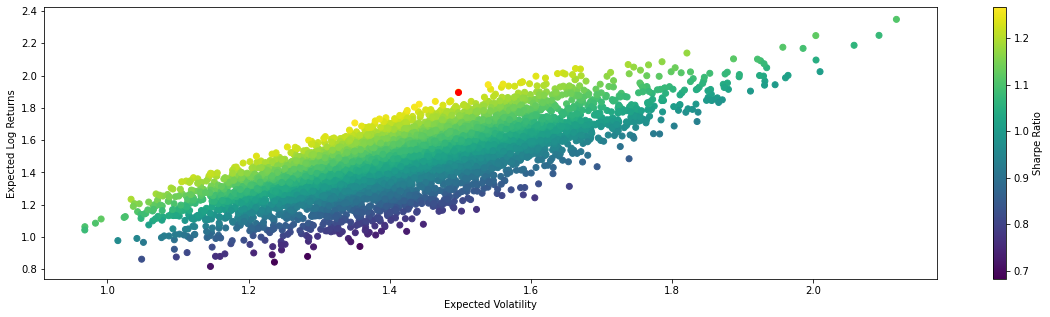

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(expected_volatility,expected_return,c=sharpe_ratio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Log Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(expected_volatility[max_index], expected_return[max_index], c='red')
plt.show()

In [88]:
smartfolio_weights

,0,1,2,3,4
0,0.036909,0.091581,0.29933,0.027685,0.544495
